In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gensim.downloader as api
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
train_file="train_data.txt"
def preprocess_text(text):
    text= text.lower()

    tokens = word_tokenize(text)

    tokens = [token for token in tokens if token not in string.punctuation]

    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]

    processed_text = ' '.join(tokens)

    return processed_text
train_df = pd.read_csv(train_file, sep=' ::: ', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'], engine='python')
train_df['Plot'] = train_df['DESCRIPTION'].apply(preprocess_text)
test_file="test_data.txt"
test_df = pd.read_csv(train_file, sep=' ::: ', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'], engine='python')
test_df['Plot'] = test_df['DESCRIPTION'].apply(preprocess_text)

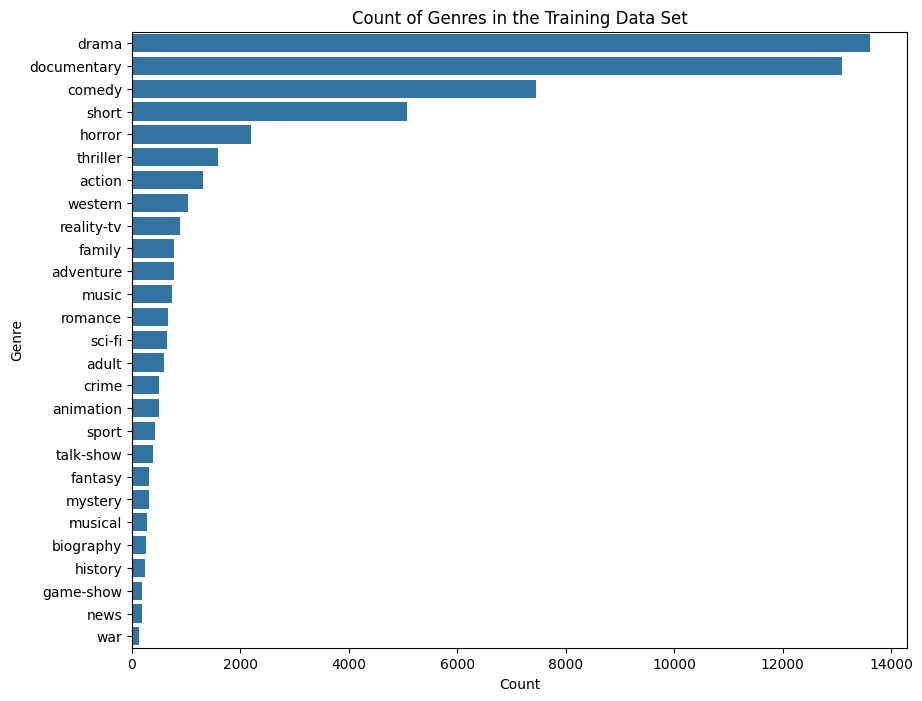

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(y=train_df['GENRE'], order=train_df['GENRE'].value_counts().index)
plt.title('Count of Genres in the Training Data Set')
plt.xlabel('Count')
plt.ylabel('Genre')
plt. show()

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train = tfidf_vectorizer.fit_transform(train_df['Plot'])
X_test = tfidf_vectorizer.transform(test_df['Plot'])

In [ ]:
y_train = np.array(train_df['GENRE'])
y_test = np.array(test_df['GENRE'])

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test)
print(y_pred)
print('Lenght of y_pred:{len(y_pred)}')

['drama' 'thriller' 'short' ... 'comedy' 'comedy' 'documentary']
Lenght of y_pred:{len(y_pred)}


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6725384587007046


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

      action       0.68      0.46      0.55      1315
       adult       0.88      0.45      0.60       590
   adventure       0.79      0.29      0.42       775
   animation       0.77      0.23      0.36       498
   biography       0.00      0.00      0.00       265
      comedy       0.64      0.70      0.67      7447
       crime       0.64      0.12      0.20       505
 documentary       0.73      0.89      0.80     13096
       drama       0.62      0.83      0.71     13613
      family       0.72      0.20      0.31       784
     fantasy       0.79      0.11      0.20       323
   game-show       0.91      0.65      0.76       194
     history       0.00      0.00      0.00       243
      horror       0.75      0.73      0.74      2204
       music       0.76      0.58      0.66       731
     musical       0.81      0.09      0.16       277
     mystery       0.76      0.09      0.16       319
   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
def predict_genre(plot_summary):
    # Convert plot summary to TF-IDF features
    plot_tfidf = tfidf_vectorizer.transform([plot_summary])
    # Make prediction
    predicted_genre = model.predict(plot_tfidf)[0]
    return predicted_genre

In [ ]:
plot_summary = input("Enter the plot summary: ")

Enter the plot summary: Barbie ("Stereotypical Barbie") and fellow dolls reside in Barbieland, a matriarchal society populated by different versions of Barbies, Kens, and a group of discontinued models who are treated like outcasts due to their unconventional traits. While the Kens spend their days playing at the beach, considering it their profession, the Barbies hold prestigious jobs in law, science, politics, and so on. Ken ("Beach Ken") is only happy when he is with Barbie, and seeks a closer relationship with her, but she rebuffs him in favor of other activities and female friendships.  One evening at a dance party, Barbie is suddenly stricken with worries about mortality. Overnight, she develops bad breath, cellulite, and flat feet, disrupting her usual routines and the classic perfection of the Barbies. Weird Barbie, a disfigured doll, tells Barbie to find the child playing with her in the real world to cure her afflictions. Barbie decides to follow the advice and travel to the 

In [ ]:
predicted_genre = predict_genre(plot_summary)
print("Predicted genre:", predicted_genre)

Predicted genre: comedy
